## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  44.248626  1675.315341  0.137129  10.121336  1.399375
1  49.361651   848.837301  0.774638  10.434093  1.546633
2  71.051510  1416.285368  0.334184   3.367394  1.284558
3  14.441231   848.168414  0.723825   8.483418  1.423864
4  71.199151   759.846113  0.736910   7.804699  1.369276


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.25375 | train_mse: 3.16269 | train_mae: 1.3893  |  0:00:00s
epoch 1  | loss: 0.96209 | train_mse: 3.0965  | train_mae: 1.32908 |  0:00:00s
epoch 2  | loss: 0.81464 | train_mse: 2.61535 | train_mae: 1.16081 |  0:00:00s


epoch 3  | loss: 0.71796 | train_mse: 1.99783 | train_mae: 1.01498 |  0:00:00s
epoch 4  | loss: 0.69977 | train_mse: 1.42998 | train_mae: 0.87161 |  0:00:00s
epoch 5  | loss: 0.77036 | train_mse: 1.41862 | train_mae: 0.8679  |  0:00:00s
epoch 6  | loss: 0.75111 | train_mse: 1.32012 | train_mae: 0.85197 |  0:00:00s


epoch 7  | loss: 0.49294 | train_mse: 1.07176 | train_mae: 0.7621  |  0:00:00s
epoch 8  | loss: 0.5378  | train_mse: 1.18931 | train_mae: 0.76031 |  0:00:00s
epoch 9  | loss: 0.47742 | train_mse: 1.44924 | train_mae: 0.82749 |  0:00:00s
epoch 10 | loss: 0.52799 | train_mse: 1.53427 | train_mae: 0.80567 |  0:00:00s


epoch 11 | loss: 0.57183 | train_mse: 1.20852 | train_mae: 0.74812 |  0:00:01s
epoch 12 | loss: 0.4637  | train_mse: 1.10388 | train_mae: 0.75144 |  0:00:01s
epoch 13 | loss: 0.36383 | train_mse: 1.01124 | train_mae: 0.72712 |  0:00:01s


epoch 14 | loss: 0.44667 | train_mse: 1.16247 | train_mae: 0.76548 |  0:00:01s
epoch 15 | loss: 0.46992 | train_mse: 1.01008 | train_mae: 0.72034 |  0:00:01s
epoch 16 | loss: 0.41421 | train_mse: 0.79671 | train_mae: 0.62682 |  0:00:01s


epoch 17 | loss: 0.37963 | train_mse: 0.72109 | train_mae: 0.59555 |  0:00:01s
epoch 18 | loss: 0.27938 | train_mse: 0.59305 | train_mae: 0.54647 |  0:00:01s
epoch 19 | loss: 0.20363 | train_mse: 0.60806 | train_mae: 0.50976 |  0:00:01s


epoch 20 | loss: 0.31293 | train_mse: 0.42605 | train_mae: 0.43525 |  0:00:01s
epoch 21 | loss: 0.4666  | train_mse: 0.22475 | train_mae: 0.33349 |  0:00:01s
epoch 22 | loss: 0.44857 | train_mse: 0.27058 | train_mae: 0.3622  |  0:00:01s
epoch 23 | loss: 0.53369 | train_mse: 0.29139 | train_mae: 0.4026  |  0:00:01s


epoch 24 | loss: 0.38399 | train_mse: 0.32188 | train_mae: 0.42529 |  0:00:01s
epoch 25 | loss: 0.36538 | train_mse: 0.39112 | train_mae: 0.47048 |  0:00:02s
epoch 26 | loss: 0.28688 | train_mse: 0.43446 | train_mae: 0.50138 |  0:00:02s
epoch 27 | loss: 0.31357 | train_mse: 0.4902  | train_mae: 0.52506 |  0:00:02s


epoch 28 | loss: 0.21455 | train_mse: 0.33723 | train_mae: 0.45964 |  0:00:02s
epoch 29 | loss: 0.36754 | train_mse: 0.26275 | train_mae: 0.40679 |  0:00:02s
epoch 30 | loss: 0.26445 | train_mse: 0.26478 | train_mae: 0.39583 |  0:00:02s


epoch 31 | loss: 0.3775  | train_mse: 0.30844 | train_mae: 0.43095 |  0:00:02s
epoch 32 | loss: 0.33195 | train_mse: 0.30981 | train_mae: 0.42651 |  0:00:02s
epoch 33 | loss: 0.27055 | train_mse: 0.29622 | train_mae: 0.42018 |  0:00:02s


epoch 34 | loss: 0.2529  | train_mse: 0.37904 | train_mae: 0.46692 |  0:00:02s
epoch 35 | loss: 0.38803 | train_mse: 0.37057 | train_mae: 0.4503  |  0:00:03s


epoch 36 | loss: 0.32778 | train_mse: 0.27042 | train_mae: 0.39446 |  0:00:03s
epoch 37 | loss: 0.60389 | train_mse: 0.17195 | train_mae: 0.3197  |  0:00:03s


epoch 38 | loss: 0.35425 | train_mse: 0.22693 | train_mae: 0.35685 |  0:00:03s
epoch 39 | loss: 0.3612  | train_mse: 0.23053 | train_mae: 0.37003 |  0:00:03s


epoch 40 | loss: 0.32446 | train_mse: 0.24656 | train_mae: 0.38494 |  0:00:03s
epoch 41 | loss: 0.31424 | train_mse: 0.27882 | train_mae: 0.39654 |  0:00:03s
epoch 42 | loss: 0.31477 | train_mse: 0.24958 | train_mae: 0.38268 |  0:00:03s


epoch 43 | loss: 0.18897 | train_mse: 0.20573 | train_mae: 0.34773 |  0:00:04s
epoch 44 | loss: 0.50969 | train_mse: 0.21067 | train_mae: 0.3501  |  0:00:04s


epoch 45 | loss: 0.42808 | train_mse: 0.22501 | train_mae: 0.35821 |  0:00:04s
epoch 46 | loss: 0.23972 | train_mse: 0.22654 | train_mae: 0.35611 |  0:00:04s


epoch 47 | loss: 0.22806 | train_mse: 0.27174 | train_mae: 0.36378 |  0:00:04s


epoch 48 | loss: 0.5266  | train_mse: 0.22282 | train_mae: 0.3446  |  0:00:05s


epoch 49 | loss: 0.41973 | train_mse: 0.2428  | train_mae: 0.34375 |  0:00:05s


epoch 50 | loss: 0.37434 | train_mse: 0.27654 | train_mae: 0.35977 |  0:00:05s


epoch 51 | loss: 0.35362 | train_mse: 0.28966 | train_mae: 0.37746 |  0:00:05s
epoch 52 | loss: 0.26179 | train_mse: 0.29481 | train_mae: 0.39278 |  0:00:06s
epoch 53 | loss: 0.37252 | train_mse: 0.32426 | train_mae: 0.42162 |  0:00:06s


epoch 54 | loss: 0.30619 | train_mse: 0.26432 | train_mae: 0.38838 |  0:00:06s
epoch 55 | loss: 0.35122 | train_mse: 0.21545 | train_mae: 0.36499 |  0:00:06s
epoch 56 | loss: 0.21594 | train_mse: 0.23405 | train_mae: 0.36163 |  0:00:06s


epoch 57 | loss: 0.38075 | train_mse: 0.28726 | train_mae: 0.39709 |  0:00:06s
epoch 58 | loss: 0.25435 | train_mse: 0.22428 | train_mae: 0.35463 |  0:00:06s
epoch 59 | loss: 0.27342 | train_mse: 0.15601 | train_mae: 0.28827 |  0:00:06s


epoch 60 | loss: 0.30361 | train_mse: 0.19048 | train_mae: 0.31397 |  0:00:06s
epoch 61 | loss: 0.4098  | train_mse: 0.22713 | train_mae: 0.34991 |  0:00:06s
epoch 62 | loss: 0.35653 | train_mse: 0.22311 | train_mae: 0.34819 |  0:00:06s


epoch 63 | loss: 0.52742 | train_mse: 0.27427 | train_mae: 0.39499 |  0:00:06s
epoch 64 | loss: 0.25825 | train_mse: 0.29566 | train_mae: 0.42424 |  0:00:06s
epoch 65 | loss: 0.31733 | train_mse: 0.21131 | train_mae: 0.35643 |  0:00:07s


epoch 66 | loss: 0.38452 | train_mse: 0.19701 | train_mae: 0.32325 |  0:00:07s
epoch 67 | loss: 0.51033 | train_mse: 0.21489 | train_mae: 0.33993 |  0:00:07s
epoch 68 | loss: 0.52221 | train_mse: 0.21892 | train_mae: 0.34237 |  0:00:07s


epoch 69 | loss: 0.23236 | train_mse: 0.26037 | train_mae: 0.38939 |  0:00:07s
epoch 70 | loss: 0.21172 | train_mse: 0.34288 | train_mae: 0.44919 |  0:00:07s
epoch 71 | loss: 0.54684 | train_mse: 0.32129 | train_mae: 0.44328 |  0:00:07s


epoch 72 | loss: 0.40834 | train_mse: 0.27976 | train_mae: 0.37763 |  0:00:07s
epoch 73 | loss: 0.24439 | train_mse: 0.23421 | train_mae: 0.33749 |  0:00:07s
epoch 74 | loss: 0.39338 | train_mse: 0.18568 | train_mae: 0.30272 |  0:00:07s
epoch 75 | loss: 0.33238 | train_mse: 0.16947 | train_mae: 0.31396 |  0:00:07s


epoch 76 | loss: 0.34122 | train_mse: 0.1674  | train_mae: 0.30073 |  0:00:07s
epoch 77 | loss: 0.21049 | train_mse: 0.17778 | train_mae: 0.30643 |  0:00:07s
epoch 78 | loss: 0.26477 | train_mse: 0.19008 | train_mae: 0.3041  |  0:00:08s
epoch 79 | loss: 0.2268  | train_mse: 0.21016 | train_mae: 0.3139  |  0:00:08s


epoch 80 | loss: 0.41618 | train_mse: 0.17328 | train_mae: 0.30878 |  0:00:08s
epoch 81 | loss: 0.23559 | train_mse: 0.14688 | train_mae: 0.27632 |  0:00:08s
epoch 82 | loss: 0.18643 | train_mse: 0.15522 | train_mae: 0.29704 |  0:00:08s


epoch 83 | loss: 0.38607 | train_mse: 0.16566 | train_mae: 0.30292 |  0:00:08s
epoch 84 | loss: 0.26506 | train_mse: 0.15982 | train_mae: 0.29985 |  0:00:08s
epoch 85 | loss: 0.26593 | train_mse: 0.14209 | train_mae: 0.28039 |  0:00:08s
epoch 86 | loss: 0.21221 | train_mse: 0.15246 | train_mae: 0.29755 |  0:00:08s


epoch 87 | loss: 0.27034 | train_mse: 0.15208 | train_mae: 0.30308 |  0:00:08s
epoch 88 | loss: 0.22927 | train_mse: 0.14357 | train_mae: 0.29401 |  0:00:08s
epoch 89 | loss: 0.19308 | train_mse: 0.17639 | train_mae: 0.31659 |  0:00:08s
epoch 90 | loss: 0.1703  | train_mse: 0.13701 | train_mae: 0.28192 |  0:00:08s


epoch 91 | loss: 0.18289 | train_mse: 0.12131 | train_mae: 0.26161 |  0:00:08s
epoch 92 | loss: 0.33644 | train_mse: 0.14476 | train_mae: 0.29334 |  0:00:08s
epoch 93 | loss: 0.47979 | train_mse: 0.17362 | train_mae: 0.32037 |  0:00:09s
epoch 94 | loss: 0.22101 | train_mse: 0.26054 | train_mae: 0.34894 |  0:00:09s


epoch 95 | loss: 0.20519 | train_mse: 0.32478 | train_mae: 0.32815 |  0:00:09s
epoch 96 | loss: 0.39239 | train_mse: 0.33538 | train_mae: 0.37753 |  0:00:09s
epoch 97 | loss: 0.24366 | train_mse: 0.18437 | train_mae: 0.31235 |  0:00:09s


epoch 98 | loss: 0.21333 | train_mse: 0.16061 | train_mae: 0.28856 |  0:00:09s
epoch 99 | loss: 0.27183 | train_mse: 0.20739 | train_mae: 0.3503  |  0:00:09s
epoch 100| loss: 0.24386 | train_mse: 0.16204 | train_mae: 0.30991 |  0:00:09s
epoch 101| loss: 0.35488 | train_mse: 0.1568  | train_mae: 0.31513 |  0:00:09s


epoch 102| loss: 0.2754  | train_mse: 0.1585  | train_mae: 0.3088  |  0:00:09s
epoch 103| loss: 0.24936 | train_mse: 0.16543 | train_mae: 0.30904 |  0:00:09s
epoch 104| loss: 0.26565 | train_mse: 0.14489 | train_mae: 0.28958 |  0:00:09s
epoch 105| loss: 0.2015  | train_mse: 0.12892 | train_mae: 0.27682 |  0:00:09s


epoch 106| loss: 0.16924 | train_mse: 0.1219  | train_mae: 0.2715  |  0:00:09s
epoch 107| loss: 0.14509 | train_mse: 0.11947 | train_mae: 0.25587 |  0:00:09s
epoch 108| loss: 0.22123 | train_mse: 0.12861 | train_mae: 0.27447 |  0:00:10s


epoch 109| loss: 0.20149 | train_mse: 0.11759 | train_mae: 0.2676  |  0:00:10s
epoch 110| loss: 0.15057 | train_mse: 0.10465 | train_mae: 0.24679 |  0:00:10s
epoch 111| loss: 0.18178 | train_mse: 0.09707 | train_mae: 0.2421  |  0:00:10s


epoch 112| loss: 0.23147 | train_mse: 0.10064 | train_mae: 0.23611 |  0:00:10s
epoch 113| loss: 0.2955  | train_mse: 0.10937 | train_mae: 0.24719 |  0:00:10s
epoch 114| loss: 0.18429 | train_mse: 0.17672 | train_mae: 0.26742 |  0:00:10s
epoch 115| loss: 0.22058 | train_mse: 0.18292 | train_mae: 0.26502 |  0:00:10s


epoch 116| loss: 0.16222 | train_mse: 0.10486 | train_mae: 0.23645 |  0:00:10s
epoch 117| loss: 0.11071 | train_mse: 0.12695 | train_mae: 0.26727 |  0:00:10s
epoch 118| loss: 0.14595 | train_mse: 0.13118 | train_mae: 0.27516 |  0:00:10s
epoch 119| loss: 0.21544 | train_mse: 0.10893 | train_mae: 0.25418 |  0:00:10s


epoch 120| loss: 0.14877 | train_mse: 0.11919 | train_mae: 0.27137 |  0:00:10s
epoch 121| loss: 0.21088 | train_mse: 0.12443 | train_mae: 0.27767 |  0:00:10s
epoch 122| loss: 0.19129 | train_mse: 0.10872 | train_mae: 0.26049 |  0:00:11s


epoch 123| loss: 0.19539 | train_mse: 0.11516 | train_mae: 0.27104 |  0:00:11s
epoch 124| loss: 0.36957 | train_mse: 0.11676 | train_mae: 0.27508 |  0:00:11s
epoch 125| loss: 0.15732 | train_mse: 0.1139  | train_mae: 0.26895 |  0:00:11s


epoch 126| loss: 0.31699 | train_mse: 0.13188 | train_mae: 0.28694 |  0:00:11s
epoch 127| loss: 0.16341 | train_mse: 0.13462 | train_mae: 0.28695 |  0:00:11s
epoch 128| loss: 0.15668 | train_mse: 0.12682 | train_mae: 0.27508 |  0:00:11s
epoch 129| loss: 0.29463 | train_mse: 0.10554 | train_mae: 0.25466 |  0:00:11s


epoch 130| loss: 0.21375 | train_mse: 0.10333 | train_mae: 0.25187 |  0:00:11s
epoch 131| loss: 0.28521 | train_mse: 0.14506 | train_mae: 0.26491 |  0:00:11s
epoch 132| loss: 0.19791 | train_mse: 0.11677 | train_mae: 0.25893 |  0:00:11s
epoch 133| loss: 0.17104 | train_mse: 0.12934 | train_mae: 0.28547 |  0:00:11s


epoch 134| loss: 0.16623 | train_mse: 0.15056 | train_mae: 0.30912 |  0:00:11s
epoch 135| loss: 0.35172 | train_mse: 0.16864 | train_mae: 0.30685 |  0:00:11s
epoch 136| loss: 0.17004 | train_mse: 0.13843 | train_mae: 0.29346 |  0:00:12s
epoch 137| loss: 0.1653  | train_mse: 0.32929 | train_mae: 0.34437 |  0:00:12s


epoch 138| loss: 0.20637 | train_mse: 0.30275 | train_mae: 0.32893 |  0:00:12s
epoch 139| loss: 0.16451 | train_mse: 0.34128 | train_mae: 0.33609 |  0:00:12s
epoch 140| loss: 0.1698  | train_mse: 0.16633 | train_mae: 0.3068  |  0:00:12s


epoch 141| loss: 0.25854 | train_mse: 0.19882 | train_mae: 0.33348 |  0:00:12s
epoch 142| loss: 0.21569 | train_mse: 0.15338 | train_mae: 0.31477 |  0:00:12s
epoch 143| loss: 0.19457 | train_mse: 0.15956 | train_mae: 0.31539 |  0:00:12s
epoch 144| loss: 0.22735 | train_mse: 0.23005 | train_mae: 0.32018 |  0:00:12s


epoch 145| loss: 0.44789 | train_mse: 0.24022 | train_mae: 0.29816 |  0:00:12s
epoch 146| loss: 0.33023 | train_mse: 0.15468 | train_mae: 0.28387 |  0:00:12s
epoch 147| loss: 0.24436 | train_mse: 0.14845 | train_mae: 0.27342 |  0:00:12s


epoch 148| loss: 0.3117  | train_mse: 0.11912 | train_mae: 0.26292 |  0:00:12s
epoch 149| loss: 0.37446 | train_mse: 0.10258 | train_mae: 0.24645 |  0:00:12s
epoch 150| loss: 0.20039 | train_mse: 0.09473 | train_mae: 0.24175 |  0:00:13s


epoch 151| loss: 0.44792 | train_mse: 0.0948  | train_mae: 0.24685 |  0:00:13s
epoch 152| loss: 0.24803 | train_mse: 0.10231 | train_mae: 0.25731 |  0:00:13s
epoch 153| loss: 0.17084 | train_mse: 0.11671 | train_mae: 0.26532 |  0:00:13s


epoch 154| loss: 0.15509 | train_mse: 0.13368 | train_mae: 0.27811 |  0:00:13s
epoch 155| loss: 0.26842 | train_mse: 0.13565 | train_mae: 0.27288 |  0:00:13s


epoch 156| loss: 0.29722 | train_mse: 0.13661 | train_mae: 0.278   |  0:00:13s
epoch 157| loss: 0.28022 | train_mse: 0.12524 | train_mae: 0.26853 |  0:00:13s
epoch 158| loss: 0.26851 | train_mse: 0.12164 | train_mae: 0.26033 |  0:00:13s


epoch 159| loss: 0.40924 | train_mse: 0.11519 | train_mae: 0.26107 |  0:00:14s


epoch 160| loss: 0.24485 | train_mse: 0.10747 | train_mae: 0.26136 |  0:00:14s
epoch 161| loss: 0.19187 | train_mse: 0.1209  | train_mae: 0.27449 |  0:00:14s
epoch 162| loss: 0.16434 | train_mse: 0.13615 | train_mae: 0.28728 |  0:00:14s



Early stopping occurred at epoch 162 with best_epoch = 112 and best_train_mae = 0.23611
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

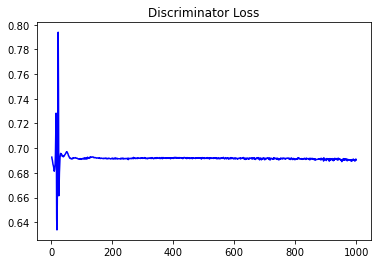

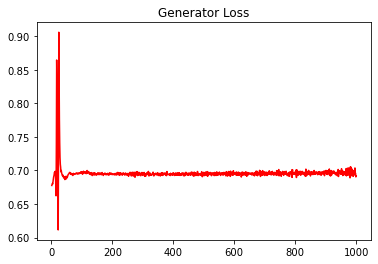

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.425204910987862


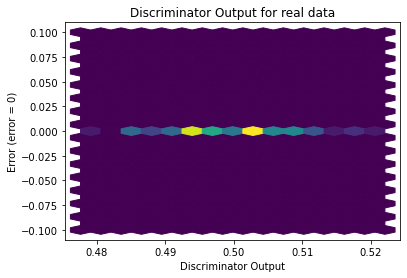

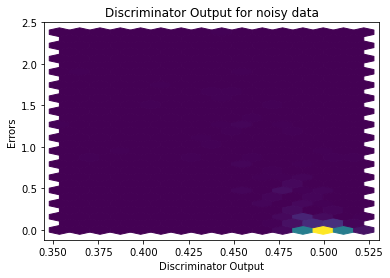

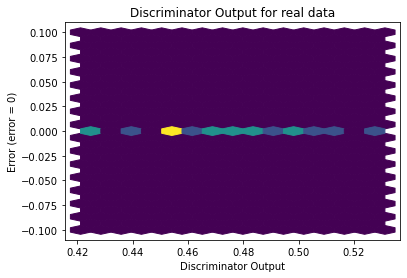

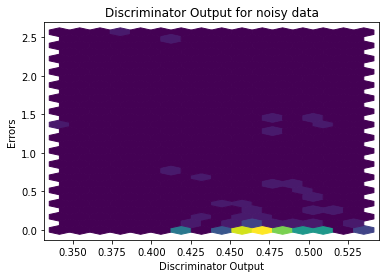

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


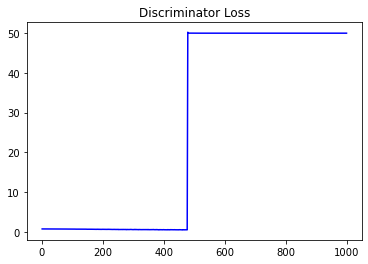

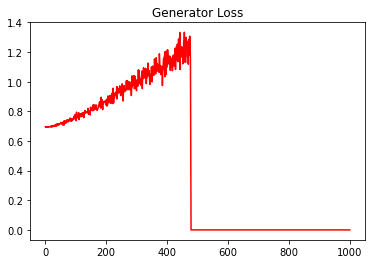

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
178.5562843499492


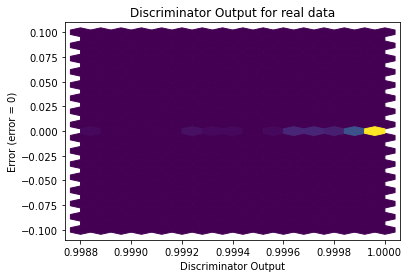

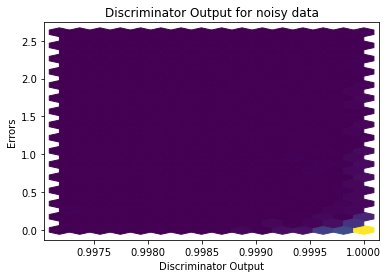

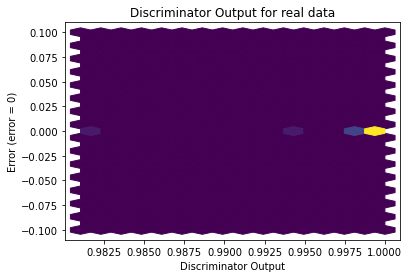

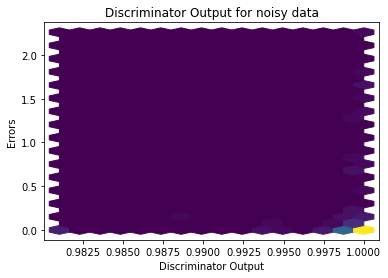

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0512]], requires_grad=True)
